In [34]:
import os
import numpy as np
import ipywidgets as widgets

import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

from utils import ParticleSimulation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3D

In [166]:
N = 20
D = 3
BETA = 2.5
# BETA = np.round((N**2 / np.pi**(2)),2) + 5
N_STEPS = 1000
print(f"D, BETA, N, N_STEPS : {D}, {BETA}, {N}, {N_STEPS}")

sim3d = ParticleSimulation(n=N, d=D, beta=BETA, steps=N_STEPS)
sim3d.compute_trajectory()
sim3d.generate_animation()
# sim.plot_step(step=0, save=True)

D, BETA, N, N_STEPS : 3, 2.5, 20, 1000


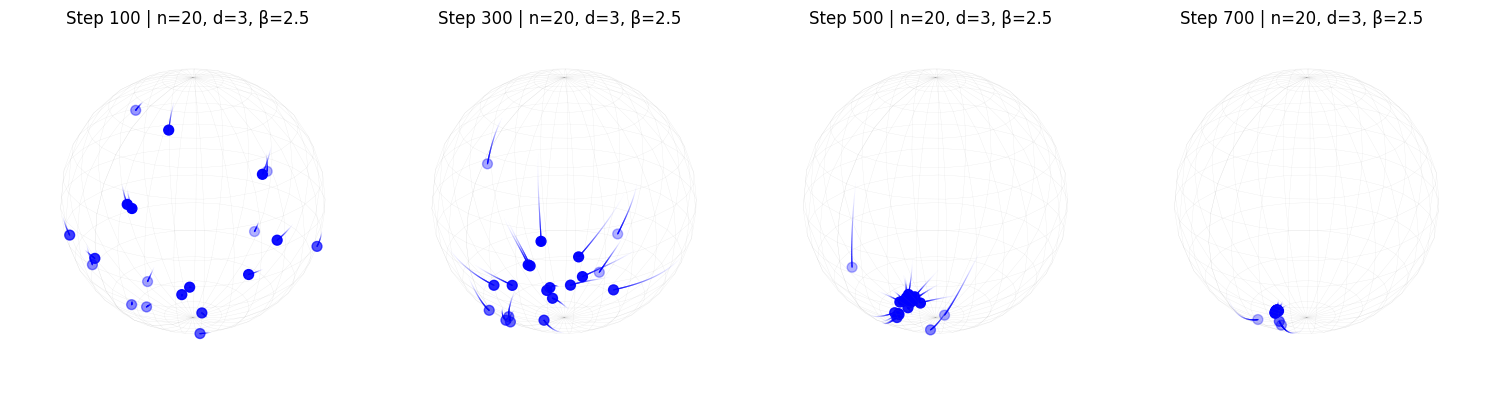

In [196]:
sim3d.plot_selected_steps(
    plt_steps=[100, 300, 500, 700], save=True, trace_length=200, azim=45, elev=25
)

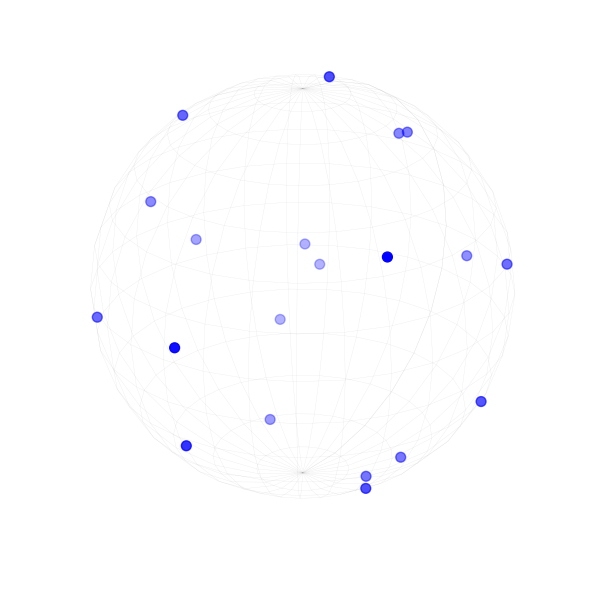

In [221]:
sim3d.plot_step(
    step=0,
    save=True,
    trace_length=200,
    azim=-135,
    elev=25,
    drop_title=True,
    # margin_3d=0,
)

### 2D

In [151]:
N = 20
D = 2
BETA = 2.5
# BETA = np.round((N**2 / np.pi**(2)),2) + 5
N_STEPS = 1500
print(f"D, BETA, N, N_STEPS : {D}, {BETA}, {N}, {N_STEPS}")

sim2d = ParticleSimulation(n=N, d=D, beta=BETA, steps=N_STEPS)
sim2d.compute_trajectory()
sim2d.generate_animation()
# sim.plot_step(step=0, save=True)

D, BETA, N, N_STEPS : 2, 2.5, 20, 1500


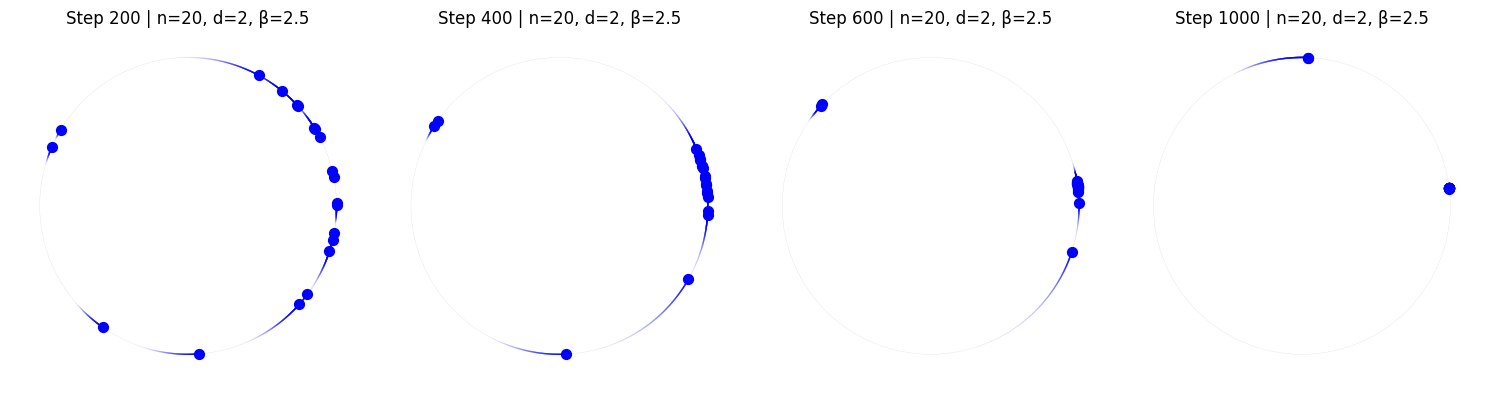

In [195]:
sim2d.plot_selected_steps(plt_steps=[200, 400, 600, 1000], save=True, trace_length=200)

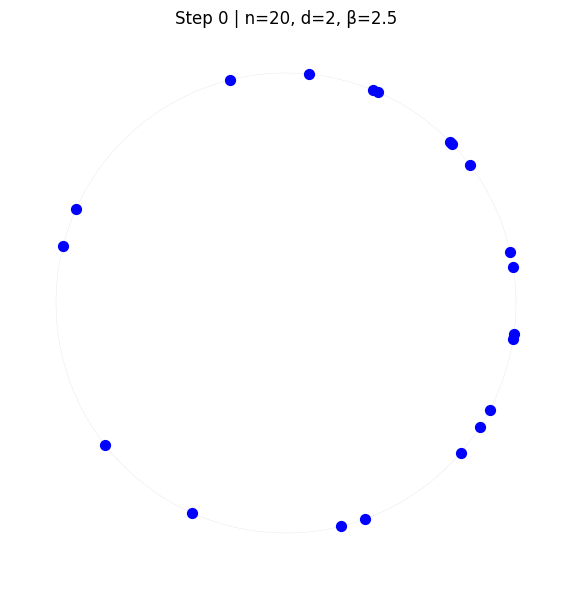

In [191]:
sim2d.plot_step(
    step=0,
    save=True,
    trace_length=200,
    # drop_title=True
)

### Plot Multiple

In [ ]:
# # desired plots
# params = [
#     # D, BETA, N, N_STEPS
#     (2, 0, 30, 1000),
#     (2, 1, 30, 1000),
#     (2, 1.5, 30, 1500),
#     (2, 2, 30, 3000),

#     (2, 2.5, 30, 5000),
#     (2, 2.5, 50, 2000), # test larger n for same beta
#     (2, 2.5, 75, 5000), # test larger n for same beta

#     (2, 3, 30, 5000),
#     (2, 15, 10, 5000), # test n^2/pi^2 + 5 case
# ]

# for d, beta, n, n_steps in params:
#     print(f"Running simulation for d={d}, beta={beta}, n={n}, n_steps={n_steps}")
#     sim = ParticleSimulation(n=N, d=D, beta=BETA, steps=N_STEPS)
#     sim.compute_trajectory()
#     sim.generate_animation()

### OLD Code

In [ ]:
# def simulate_sphere_clustering(
#     n: int = 20,
#     d: int = 3,
#     beta: float = 0.0,
#     dt: float = 0.01,
#     steps: int = 1000,
#     seed: int = 0,
#     antipodal_pair: bool = False,
#     force_2d: bool = False,
#     save_mp4: bool = False,
#     show_widget: bool = True,
#     gif_dir: str = "../plots",
# ):
#     """
#     Simulates a clustering process on the unit sphere using a gradient-like update.
#     """

#     if d < 2:
#         raise ValueError("Dimension d must be >= 2.")

#     np.random.seed(seed)
#     x = np.random.randn(n, d)
#     x = x / np.linalg.norm(x, axis=1, keepdims=True)

#     if antipodal_pair:
#         base = np.random.randn(d)
#         base = base / np.linalg.norm(base)
#         x[0] = base
#         x[1] = -base
#         x = x[:2]
#         n = 2

#     def project(xi, y):
#         return y - np.dot(xi, y) * xi

#     trajectory = np.zeros((steps, n, d))
#     trajectory[0] = x.copy()

#     for step in range(1, steps):
#         x_new = np.zeros((n, d))
#         for i in range(n):
#             dots = np.dot(x[i], x.T)
#             weights = np.exp(beta * dots)
#             Z = np.sum(weights)
#             if not np.isfinite(Z) or Z == 0:
#                 raise ValueError(
#                     f"Invalid normalization factor Z={Z} at step={step}, particle={i}"
#                 )
#             weighted_sum = np.sum(weights[:, np.newaxis] * x, axis=0) / Z
#             delta = project(x[i], weighted_sum)
#             xi_new = x[i] + dt * delta
#             x_new[i] = xi_new / np.linalg.norm(xi_new)
#         x = x_new
#         trajectory[step] = x

#     def make_title(step, d, n, beta, plot_dim):
#         proj_info = ""
#         if d > plot_dim:
#             proj_info = f" | {plot_dim}D projection"
#         return f"Step {step} | n={n}, d={d}, β={beta}{proj_info}"

#     def plot_2d_projection(ax, x_step, step):
#         ax.clear()
#         ax.add_artist(plt.Circle((0, 0), 1, color="gray", fill=False))
#         ax.set_aspect("equal")
#         if d > 2:
#             sc = ax.scatter(
#                 x_step[:, 0], x_step[:, 1], c=x_step[:, 2], cmap="coolwarm", s=50
#             )
#         else:
#             sc = ax.scatter(x_step[:, 0], x_step[:, 1], color="blue", s=50)
#         ax.set_xlim([-1.2, 1.2])
#         ax.set_ylim([-1.2, 1.2])
#         ax.set_title(make_title(step, d, n, beta, plot_dim=2))
#         return sc

#     def plot_3d(ax, x_step, step):
#         ax.clear()
#         ax.scatter(x_step[:, 0], x_step[:, 1], x_step[:, 2], color="blue", s=50)
#         u, v = np.linspace(0, 2 * np.pi, 30), np.linspace(0, np.pi, 15)
#         xs = np.outer(np.cos(u), np.sin(v))
#         ys = np.outer(np.sin(u), np.sin(v))
#         zs = np.outer(np.ones_like(u), np.cos(v))
#         ax.plot_wireframe(xs, ys, zs, color="gray", alpha=0.3, linewidth=0.5)
#         ax.set_xlim([-1.2, 1.2])
#         ax.set_ylim([-1.2, 1.2])
#         ax.set_zlim([-1.2, 1.2])
#         ax.set_box_aspect([1, 1, 1])
#         ax.view_init(elev=25, azim=45)
#         ax.grid(False)
#         ax.set_title(make_title(step, d, n, beta, plot_dim=3))

#     if save_mp4:
#         os.makedirs(gif_dir, exist_ok=True)
#         extra_info = ""
#         extra_info += f"_force2d={force_2d}" if force_2d else ""
#         extra_info += f"_antipodal={antipodal_pair}" if antipodal_pair else ""
#         filename = f"clustering_d={d}_beta={beta}_n={n}_dt={dt}_steps={steps}_seed={seed}{extra_info}.mp4"
#         filepath = os.path.join(gif_dir, filename)

#         fig = plt.figure(figsize=(6, 6))
#         ax = (
#             fig.add_subplot(111, projection="3d")
#             if d >= 3 and not force_2d
#             else fig.add_subplot(111)
#         )

#         def update(frame):
#             x_step = trajectory[frame]
#             if d >= 3 and not force_2d:
#                 plot_3d(ax, x_step, frame)
#             else:
#                 plot_2d_projection(ax, x_step, frame)
#             return (ax,)

#         fps = 20
#         # fps = max(1, steps // 100)
#         selected_frames = range(0, steps, fps)
#         ani = animation.FuncAnimation(
#             fig,
#             update,
#             frames=selected_frames,
#             blit=False,
#             repeat=False,
#         )

#         ani.save(filepath, writer="ffmpeg", fps=15, dpi=200)
#         plt.close()

#     # Interactive visualization
#     def plot_step(step):
#         step = step - 1
#         x_step = trajectory[step]
#         if d >= 3 and not force_2d:
#             fig = plt.figure(figsize=(6, 6))
#             ax = fig.add_subplot(111, projection="3d")
#             plot_3d(ax, x_step, step)
#             plt.show()
#         else:
#             fig = plt.figure(figsize=(5, 5))
#             ax = fig.add_subplot(111)
#             plot_2d_projection(ax, x_step, step)
#             plt.show()

#     if show_widget:
#         slider = widgets.IntSlider(min=1, max=steps, step=10, value=1, description="Step")
#         widgets.interact(plot_step, step=slider)


In [8]:
# N = 10
# D = 10
# BETA = 2.5
# # BETA = np.round((N**2 / np.pi**(2)),2) + 5
# N_STEPS = 1000
# print(f"N, D, BETA : {N}, {D}, {BETA}")

# simulate_sphere_clustering(
#     n=N,
#     d=D,
#     beta=BETA,
#     steps=N_STEPS,
#     seed=2025,
#     # antipodal_pair=True
#     # force_2d=True,
#     save_mp4=True,
# )

In [9]:
# # desired plots
# params = [
#     # D, BETA, N, N_STEPS
#     (2, 0, 30, 1000),
#     (2, 1, 30, 1000),
#     (2, 1.5, 30, 1500),
#     (2, 2, 30, 3000),

#     (2, 2.5, 30, 5000),
#     (2, 2.5, 50, 2000), # test larger n for same beta
#     (2, 2.5, 75, 5000), # test larger n for same beta

#     (2, 3, 30, 5000),
#     (2, 15, 10, 5000), # test n^2/pi^2 + 5 case
# ]

# for d, beta, n, n_steps in params:
#     print(f"Running simulation for d={d}, beta={beta}, n={n}, n_steps={n_steps}")
#     simulate_sphere_clustering(
#         n=n,
#         d=d,
#         beta=beta,
#         steps=n_steps,
#         seed=2025,
#         save_mp4=True,
#         show_widget=False,
#     )